In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd
from matplotlib.pyplot import rc_context

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
from cnmf import cNMF, load_df_from_npz
import harmonypy
sys.path.append('../../../Code/')
# from utils import TCAT

from sklearn import metrics
from utils import read_dataset_log
import harmonypy as hm
from sklearn.preprocessing import MinMaxScaler
from adjustText import adjust_text
import random


In [2]:
from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap_density = plt.cm.hsv
cmaplist = [cmap_density(i) for i in range(cmap_density.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap_density = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap_density.N)

In [3]:
from sklearn.model_selection import KFold


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from scipy.stats import fisher_exact
from scipy.stats import ttest_ind


import pickle

In [4]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [5]:
figdir = '../../../Figures/Components'

In [6]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCA

In [7]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [8]:
# AIM-associated GEPs, excluding GEPs used in other contexts
activation_geps = sorted([
 'CTLA4/CD38',
 'NME1/FABP5',
 # 'Exhaustion',
 'ICOS/CD38',
 'OX40/EBI3',
 'TIMD4/TIM3',
 'Multi-Cytokine',
 'BCL2/FAM13A',
  'RGCC/MYADM'
])
print(len(activation_geps))
activation_geps

8


['BCL2/FAM13A',
 'CTLA4/CD38',
 'ICOS/CD38',
 'Multi-Cytokine',
 'NME1/FABP5',
 'OX40/EBI3',
 'RGCC/MYADM',
 'TIMD4/TIM3']

# Plot selection process

In [9]:
auc_stepwise = pd.read_csv('../../../Data/TCAT/AUC_ActivationPrediction_AIMAssocGEP_StepwiseCOMBATSparks_20240424.tsv',
                          index_col = 0, sep = '\t')

In [10]:
auc_stepwise[['new_gep', 'auc_test_cv_Mean', 'auc_COMBAT_test_cv_mean', 'auc_Sparks_test_cv_mean']]

,new_gep,auc_test_cv_Mean,auc_COMBAT_test_cv_mean,auc_Sparks_test_cv_mean
0,ICOS/CD38,0.833191,0.890078,0.776303
1,CTLA4/CD38,0.860976,0.900205,0.821747
2,TIMD4/TIM3,0.869021,0.926657,0.811385
3,OX40/EBI3,0.868598,0.919685,0.817510
4,Multi-Cytokine,0.858392,0.908399,0.808385
5,RGCC/MYADM,0.848968,0.895381,0.802554
6,NME1/FABP5,0.819980,0.892443,0.747516
7,BCL2/FAM13A,0.727558,0.797966,0.657149


In [11]:
auc_stepwise[['new_gep', 'auc_test_cv_Mean']]

,new_gep,auc_test_cv_Mean
0,ICOS/CD38,0.833191
1,CTLA4/CD38,0.860976
2,TIMD4/TIM3,0.869021
3,OX40/EBI3,0.868598
4,Multi-Cytokine,0.858392
5,RGCC/MYADM,0.848968
6,NME1/FABP5,0.819980
7,BCL2/FAM13A,0.727558


In [12]:
# Stop when mean AUC stops increasing
auc_last = 0
for i in auc_stepwise.index:
    # print(i)
    
    auc_next = auc_stepwise.loc[i, 'auc_test_cv_Mean']
    if auc_next > auc_last:
        auc_last = auc_next
        filt_index = i
        print(filt_index, auc_last)

0 0.8331907059363326
1 0.8609760366578083
2 0.8690208774586765


In [13]:
auc_stepwise_filt = auc_stepwise.loc[range(0, filt_index + 1), :].copy()

In [14]:
auc_stepwise_filt

,geps,new_gep,step,auc_Sparks_train_cv_mean,auc_Sparks_test_cv_mean,auc_COMBAT_train_cv_mean,auc_COMBAT_test_cv_mean,auc_test_cv_Mean,auc_train_cv_Mean
0,ICOS/CD38,ICOS/CD38,0,0.776303,0.776303,0.890078,0.890078,0.833191,0.833191
1,"ICOS/CD38,CTLA4/CD38",CTLA4/CD38,1,0.821747,0.821747,0.900205,0.900205,0.860976,0.860976
2,"ICOS/CD38,CTLA4/CD38,TIMD4/TIM3",TIMD4/TIM3,2,0.811385,0.811385,0.926657,0.926657,0.869021,0.869021


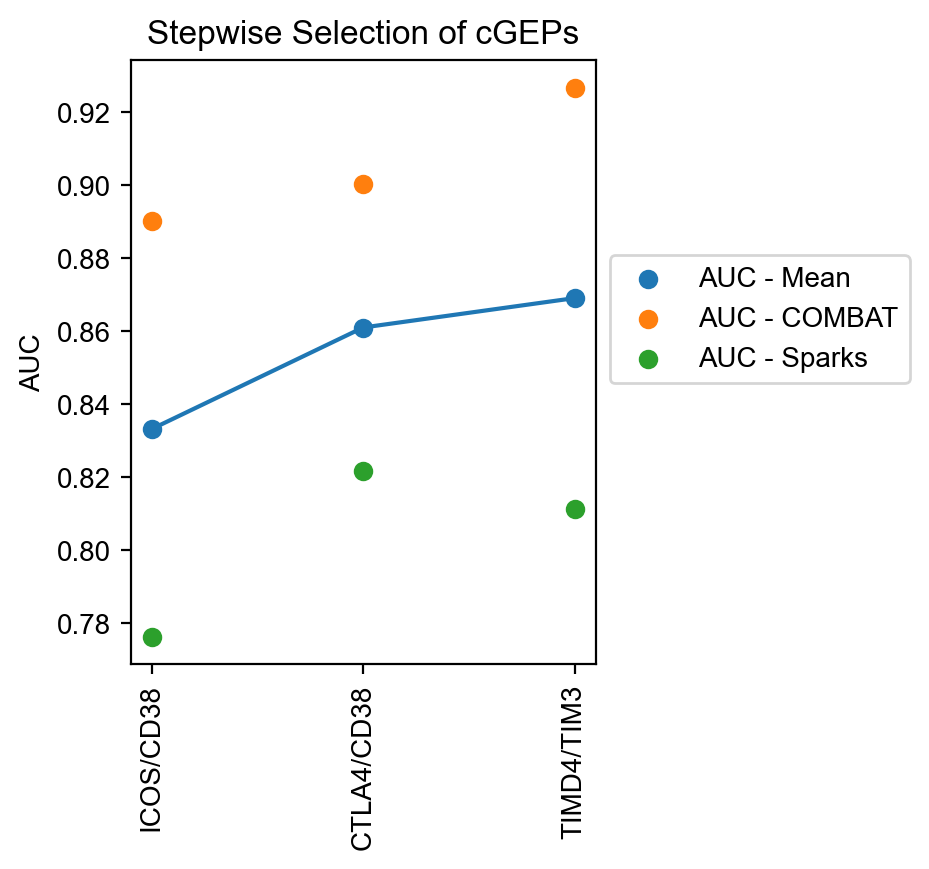

In [15]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 4))
ax.scatter(x  = auc_stepwise_filt['new_gep'], y = auc_stepwise_filt['auc_test_cv_Mean'], 
          label = 'AUC - Mean', )
plt.plot(auc_stepwise_filt['new_gep'], auc_stepwise_filt['auc_test_cv_Mean'])

for dataset in ['COMBAT', 'Sparks']:
    
    dataset_label = dataset
    # if dataset=='Stimseq':
    #     dataset_label = 'AIM-Seq'
        
    ax.scatter(x  = auc_stepwise_filt['new_gep'], y = auc_stepwise_filt['auc_%s_test_cv_mean' % dataset], 
          label = 'AUC - %s' % dataset_label)

ax.set_ylabel('AUC')
ax.set_title('Stepwise Selection of cGEPs')
ax.tick_params('x', rotation = 90)
ax.legend(bbox_to_anchor=(1, .7,))

In [21]:
tick_fontsize, label_fontsize

(8, 10)

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


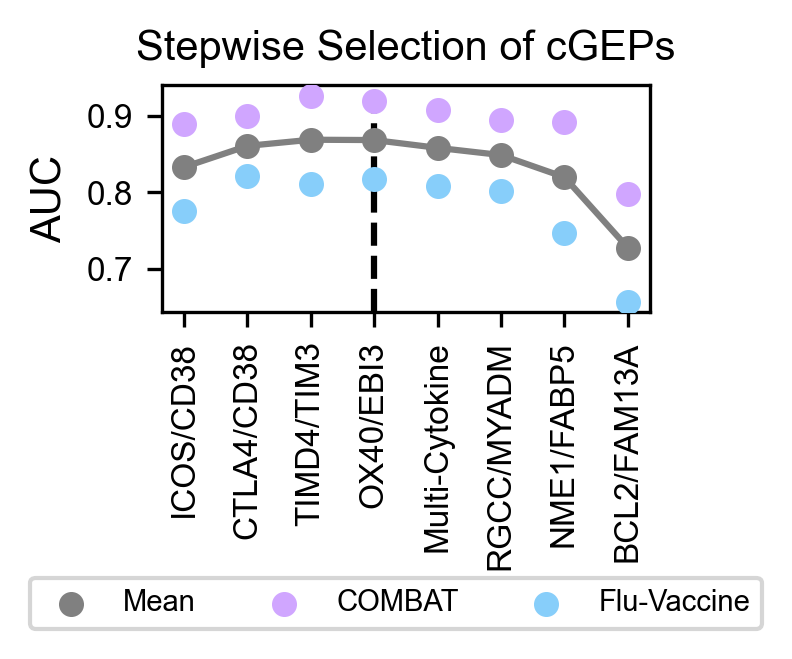

In [30]:
ds_pal = {'COMBAT' : '#D0A6FF', 'Sparks' : 'lightskyblue', 'TBRU' : 'magenta', 'Pan-Tissue' : 'gold',
         'AMP-RA' : 'mediumturquoise', 'UK-Covid' : 'lightpink', 'Stimseq' : 'palegreen', 'HIV-Vaccine' : 'coral',
         'Pan-Cancer' : 'mediumblue'}

mean_color = 'grey'

vline = 3
# Testing AUCs from kfold validation
fig, ax = plt.subplots(dpi = 300, figsize = (2.1, 1))
ax.scatter(x  = auc_stepwise['new_gep'], y = auc_stepwise['auc_test_cv_Mean'], 
          label = 'Mean', c = mean_color, zorder = 4, s =25)
plt.plot(auc_stepwise['new_gep'], auc_stepwise['auc_test_cv_Mean'], c = mean_color)

for dataset in ['COMBAT', 'Sparks']:
    
    dataset_label = dataset
    if dataset=='Sparks':
        dataset_label = 'Flu-Vaccine'
        
    ax.scatter(x  = auc_stepwise['new_gep'], y = auc_stepwise['auc_%s_test_cv_mean' % dataset], 
          label = '%s' % dataset_label, zorder = 4,  s = 25, c = ds_pal[dataset])

ylims = ax.get_ylim()
ax.vlines(x = vline, ymin = ylims[0], ymax = ylims[1], color = 'black', linestyle = 'dashed')
ax.set_ylim(ylims)
ax.set_ylabel('AUC', fontsize = label_fontsize)
ax.set_title('Stepwise Selection of cGEPs', fontsize = label_fontsize)
ax.set_xticklabels([x.replace('-Activation', '') for x in auc_stepwise['new_gep']])
ax.tick_params('x', rotation = 90)
ax.tick_params('both', labelsize = tick_fontsize)
legend = ax.legend(loc=(-.27, -1.4,),# (1, .74,)
          fontsize = tick_fontsize-1, ncol = 3)

# legend.get_frame().set_linewidth(.5)


plt.savefig(os.path.join(figdir, 'AUCScatterplot_ActivationScore_StepwiseSelection.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'AUCScatterplot_ActivationScore_StepwiseSelection.pdf'), bbox_inches="tight")
